In [ ]:
def gauss_seidel_1D(varphi, rho, maxiter = 10000, tol = 1e-4):
    
    # Get the length of potential array (1-D)
    nx = len(varphi)
    
    # Iterate until convergence or maximum iterations reached
    for it in range(maxiter):
        varphi_old = varphi.copy()

        varphi[0] = 0.0
        
        varphi[-1] = varphi[-2] + dx * i_a/sigma

        # Update the potential using the Gauss-Seidel formula
        for j in range(1, nx-1):
                varphi[j] = 0.5 * (varphi_old[j+1] + varphi[j-1] - rho[j] * dx**2 / epsilon)
        
        # Check for convergence
        if np.max(np.abs(varphi - varphi_old)) < tol:
            print(f"Converged after {it} iterations.")
            return varphi
    
    print("Maximum iterations reached without convergence.")
    return varphi

In [10]:
import numpy as np

nx = 10

c = np.heaviside(np.arange(0, 10, 1) - int(nx/2), 1)

print(c)

[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]


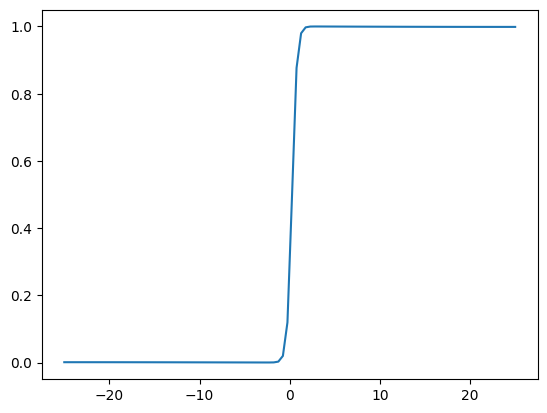

In [63]:
import numpy as np
import matplotlib.pyplot as plt


# ------------------------------------------------------------------------------
# Parameters & Constants for Phase-Field Model
# ------------------------------------------------------------------------------

M = 1.0 #mobility constant, m^5/(J*s)
kappa = 4.0 #gradient energy constant, J/m
xmax = 50.0 #physical domain size, m
nx = 100 #number of spatial discretization points
dx = xmax/(nx-1) #spatial discretization step, m
x = np.linspace(-xmax/2, xmax/2, nx) #spatial grid
dt = 0.01 #0.0271 #time step, s
nsteps = 100000 #number of time steps
trans = 12 #number of transition steps between two phases

#intialize the composition field

comp = np.zeros(nx) #composition field

comp[0:int(nx/2 - trans/2)] = 0.0 #left phase

comp[int(nx/2 + trans/2):nx] = 1.0 #right phase

for i in range (trans):
    comp[int(nx/2 - trans/2 + i)] = 1.0/trans * i #linear transition

def laplacian(f, deltax): # for the cahn-hilliard equation
    lap = np.zeros_like(f, dtype=float) #initialize the laplacian array
    for i in range(2, len(f)-2):
        lap[i] = (-f[i-2] + 16*f[i-1] - 30*f[i] + 16 * f[i+1] - f[i+2]) / 12 * (deltax ** 2)
    lap[0] = lap[1] = lap[2]
    lap[-1] = lap[-2] = lap[-3]
    return lap
# neumann

for time in range(nsteps):
    #for the Cahn-Hilliard equation (not species-specific)
    #step 1: calculate the laplacian of the concentration field
    lapc = laplacian(comp, dx)
    #step 2: compute the chemical potential (composition) at each point
    mu_comp = 4.0 * comp * (1.0 - comp) * (1.0 - 2.0 * comp) - kappa * lapc
    #step 3: find the laplacian of the chemical potential
    lap_mu = laplacian(mu_comp, dx)
    #step 4: update  the concentration field 1: calculate the laplacian of the concentration field
    comp += dt * M * lap_mu

plt.plot(x, comp)
plt.show()